In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Files already downloaded and verified
Files already downloaded and verified


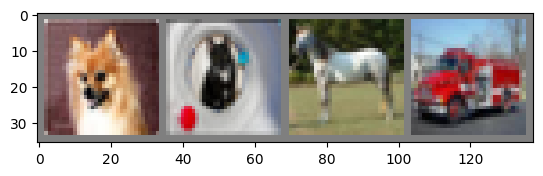

dog   cat   horse truck


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 64, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(64, 64, 3)
        self.conv3 = nn.Conv2d(64, 128, 3)
        self.conv4 = nn.Conv2d(128, 256, 3)
        self.drop1 = nn.Dropout()
        self.fc1 = nn.Linear(256 * 2 * 2, 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.drop1(F.relu(self.conv1(x)))
        x = self.drop1(F.relu(self.conv2(x)))
        x = self.pool(x)

        x = self.drop1(F.relu(self.conv3(x)))
        x = self.pool(x)

        x = self.drop1(F.relu(self.conv4(x)))
        x = self.pool(x)

        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
from torchsummary import summary
summary(net, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 30, 30]           1,792
           Dropout-2           [-1, 64, 30, 30]               0
            Conv2d-3           [-1, 64, 28, 28]          36,928
           Dropout-4           [-1, 64, 28, 28]               0
         MaxPool2d-5           [-1, 64, 14, 14]               0
            Conv2d-6          [-1, 128, 12, 12]          73,856
           Dropout-7          [-1, 128, 12, 12]               0
         MaxPool2d-8            [-1, 128, 6, 6]               0
            Conv2d-9            [-1, 256, 4, 4]         295,168
          Dropout-10            [-1, 256, 4, 4]               0
        MaxPool2d-11            [-1, 256, 2, 2]               0
           Linear-12                  [-1, 512]         524,800
           Linear-13                  [-1, 512]         262,656
           Linear-14                   

In [ ]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.302
[1,  4000] loss: 2.300
[1,  6000] loss: 2.241
[1,  8000] loss: 2.189
[1, 10000] loss: 2.166
[1, 12000] loss: 2.148
[2,  2000] loss: 2.117
[2,  4000] loss: 2.119
[2,  6000] loss: 2.105
[2,  8000] loss: 2.093
[2, 10000] loss: 2.083
[2, 12000] loss: 2.075
Finished Training


In [ ]:
for epoch in range(1):  # loop over the dataset multiple times
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        new_labels = [[0 for tt in range(10)] for t in range(4)]
        for t in range(4):
          new_labels[t][labels[t]] = 1
        labels = torch.tensor(new_labels)
        print(labels)
        # forward + backward + optimize
        outputs = net(inputs)
        print(outputs)
        print(labels.size())


tensor([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])
tensor([[0.0982, 0.1001, 0.0977, 0.0969, 0.1007, 0.1060, 0.1019, 0.0997, 0.0977,
         0.1011],
        [0.0989, 0.1031, 0.0991, 0.0979, 0.0979, 0.1031, 0.0993, 0.0989, 0.0999,
         0.1018],
        [0.0991, 0.0994, 0.0989, 0.0982, 0.0990, 0.1049, 0.1001, 0.0983, 0.1007,
         0.1015],
        [0.0996, 0.1021, 0.0982, 0.0987, 0.0989, 0.1035, 0.1000, 0.0982, 0.1006,
         0.1002]], grad_fn=<SoftmaxBackward0>)
torch.Size([4, 10])
tensor([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]])
tensor([[0.0994, 0.1034, 0.0973, 0.0961, 0.0975, 0.1062, 0.1000, 0.0988, 0.1004,
         0.1009],
        [0.0974, 0.1025, 0.0983, 0.0969, 0.0986, 0.1053, 0.0996, 0.0992, 0.1001,
         0.1022],
        [0.0984, 0.1050, 0.0990, 0.

KeyboardInterrupt: ignored

In [ ]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

In [ ]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [ ]:
net = Net()
net.load_state_dict(torch.load(PATH))

In [ ]:
outputs = net(images)

In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  dog   car   dog   horse


In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 39 %


In [ ]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 51.7 %
Accuracy for class: car   is 42.6 %
Accuracy for class: bird  is 22.5 %
Accuracy for class: cat   is 38.5 %
Accuracy for class: deer  is 18.9 %
Accuracy for class: dog   is 36.7 %
Accuracy for class: frog  is 36.0 %
Accuracy for class: horse is 60.2 %
Accuracy for class: ship  is 40.3 %
Accuracy for class: truck is 46.5 %
